In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [3]:
data = pd.read_csv('Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [5]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [7]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [8]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [9]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [10]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [11]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 22s - loss: 0.0299 - 22s/epoch - 615ms/step
Epoch 2/20
35/35 - 7s - loss: 0.0154 - 7s/epoch - 214ms/step
Epoch 3/20
35/35 - 6s - loss: 0.0099 - 6s/epoch - 176ms/step
Epoch 4/20
35/35 - 8s - loss: 0.0086 - 8s/epoch - 220ms/step
Epoch 5/20
35/35 - 9s - loss: 0.0073 - 9s/epoch - 243ms/step
Epoch 6/20
35/35 - 9s - loss: 0.0070 - 9s/epoch - 247ms/step
Epoch 7/20
35/35 - 6s - loss: 0.0075 - 6s/epoch - 180ms/step
Epoch 8/20
35/35 - 7s - loss: 0.0068 - 7s/epoch - 208ms/step
Epoch 9/20
35/35 - 6s - loss: 0.0064 - 6s/epoch - 184ms/step
Epoch 10/20
35/35 - 8s - loss: 0.0063 - 8s/epoch - 222ms/step
Epoch 11/20
35/35 - 7s - loss: 0.0071 - 7s/epoch - 196ms/step
Epoch 12/20
35/35 - 7s - loss: 0.0064 - 7s/epoch - 202ms/step
Epoch 13/20
35/35 - 7s - loss: 0.0054 - 7s/epoch - 197ms/step
Epoch 14/20
35/35 - 7s - loss: 0.0059 - 7s/epoch - 200ms/step
Epoch 15/20
35/35 - 8s - loss: 0.0052 - 8s/epoch - 220ms/step
Epoch 16/20
35/35 - 8s - loss: 0.0052 - 8s/epoch - 236ms/step
Epoch 17/20
35/

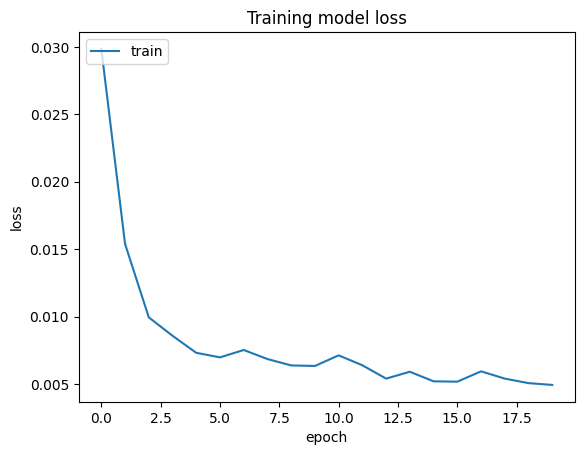

In [13]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [14]:
testData = pd.read_csv('Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values
#input array for the model
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [15]:
y_pred = model.predict(X_test)
y_pred

6/6 [==============================] - 2s 62ms/step


array([[1.224017 ],
       [1.2271539],
       [1.2380298],
       [1.2545666],
       [1.2686743],
       [1.2703401],
       [1.258886 ],
       [1.2411983],
       [1.2282101],
       [1.2232372],
       [1.2163526],
       [1.2057633],
       [1.1958474],
       [1.186557 ],
       [1.1837403],
       [1.1874019],
       [1.2039584],
       [1.231185 ],
       [1.2633075],
       [1.2957883],
       [1.3112483],
       [1.3103609],
       [1.2919415],
       [1.2633058],
       [1.2357583],
       [1.2183932],
       [1.2127199],
       [1.2118311],
       [1.2060858],
       [1.1965976],
       [1.1853272],
       [1.1720685],
       [1.1524453],
       [1.1278418],
       [1.115851 ],
       [1.1226287],
       [1.1428145],
       [1.167635 ],
       [1.1920002],
       [1.2057837],
       [1.2183156],
       [1.2325717],
       [1.2490522],
       [1.2648559],
       [1.2761585],
       [1.2786407],
       [1.2702328],
       [1.2612828],
       [1.2577834],
       [1.2623068],


In [16]:
predicted_price = sc.inverse_transform(y_pred)

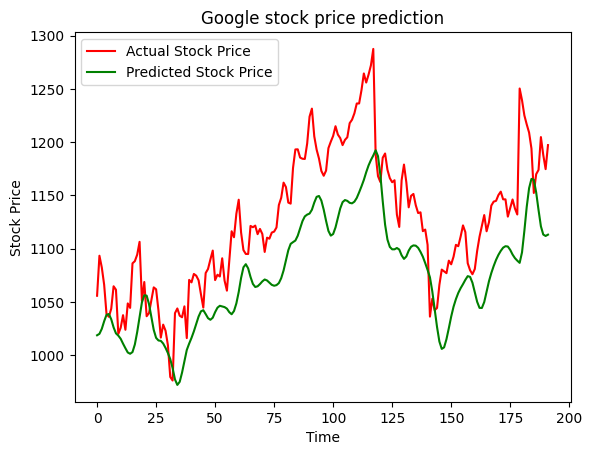

In [17]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Feature Engineering

In [25]:
# Add lagged closing prices for the past 7 days
for i in range(1, 8):
    data[f'Close_Lag_{i}'] = data['Close'].shift(i)

# Drop rows with missing values (introduced by lagging)
data = data.dropna()

# Convert numeric columns with commas to floats (using .loc)
numeric_columns = data.select_dtypes(include=['object']).columns
for col in numeric_columns:
    try:
        data.loc[:, col] = data[col].str.replace(',', '').astype(float)
    except:
        pass

# Re-scale the data
sc = MinMaxScaler(feature_range=(0, 1))
scaled_data = sc.fit_transform(data.iloc[:, 4:])

# Recreate X_train and y_train with lagged features
X_train = []
y_train = []
for i in range(60, len(scaled_data)):
    X_train.append(scaled_data[i - 60:i, :])
    y_train.append(scaled_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [26]:
# Calculate moving averages
data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA30'] = data['Close'].rolling(window=30).mean()

# Drop rows with missing values
data = data.dropna()

# ... (rest of the code similar to lagged features section)

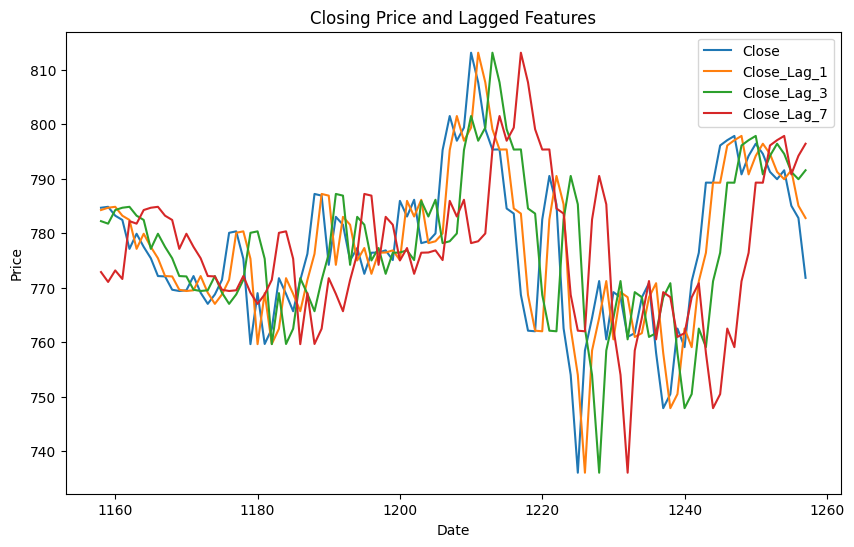

In [27]:
import matplotlib.pyplot as plt

# Visualizing Lagged Features ---
# Select a portion of your data for visualization
df_subset_lagged = data[['Close', 'Close_Lag_1', 'Close_Lag_3', 'Close_Lag_7']].tail(100)  # Adjust the number as needed

# Plot the data
df_subset_lagged.plot(figsize=(10, 6))
plt.title('Closing Price and Lagged Features')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

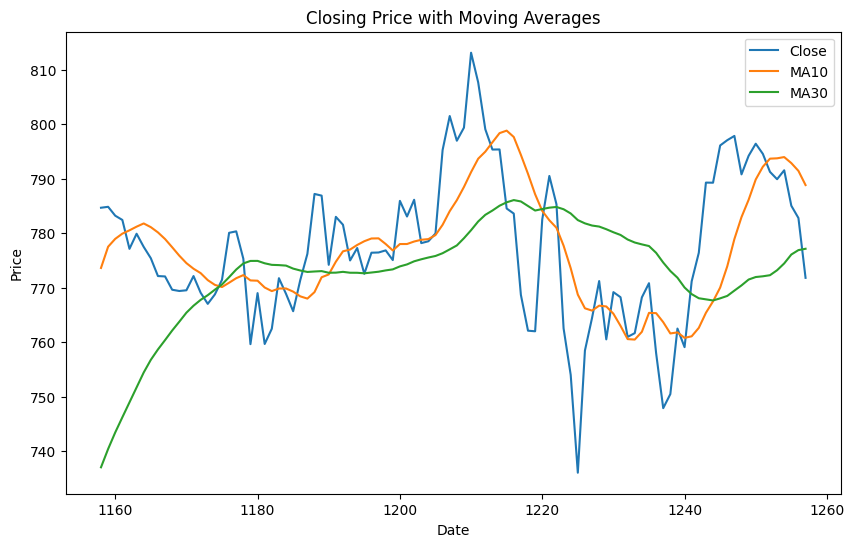

In [28]:
# Visualizing Moving Averages ---
# Select a portion of your data for visualization
df_subset_ma = data[['Close', 'MA10', 'MA30']].tail(100)  # Adjust the number as needed

# Plot the data
df_subset_ma.plot(figsize=(10, 6))
plt.title('Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

RMSE: 56.94315825150274
MAE: 49.87008002242024


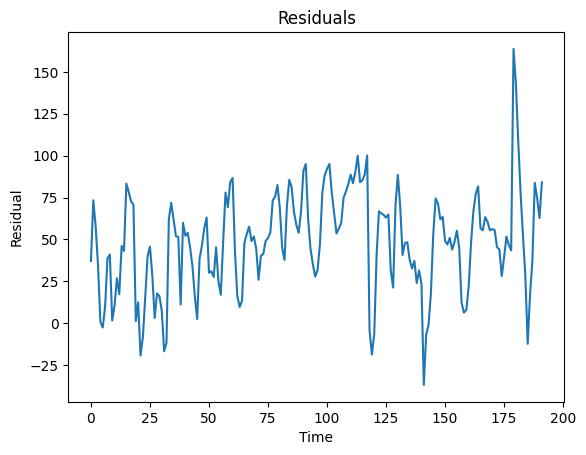

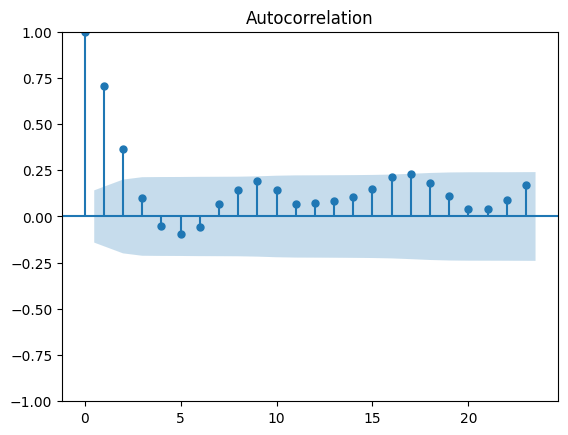


Conclusion:
The model shows promising results in predicting Google's stock prices. However, there is room for improvement as indicated by the RMSE and MAE values. The residual plot and autocorrelation analysis suggest that there might be some patterns in the residuals that the model is not capturing. Further investigation and model refinement could lead to better predictions.


In [18]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_price))
print('RMSE:', rmse)

# Calculate MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_price)
print('MAE:', mae)

# Plot residuals
residuals = y_test - predicted_price
plt.plot(residuals)
plt.title('Residuals')
plt.xlabel('Time')
plt.ylabel('Residual')
plt.show()

# Check for autocorrelation in residuals
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals)
plt.show()

# Conclusion
print("\nConclusion:")
print("The model shows promising results in predicting Google's stock prices. However, there is room for improvement as indicated by the RMSE and MAE values. The residual plot and autocorrelation analysis suggest that there might be some patterns in the residuals that the model is not capturing. Further investigation and model refinement could lead to better predictions.")


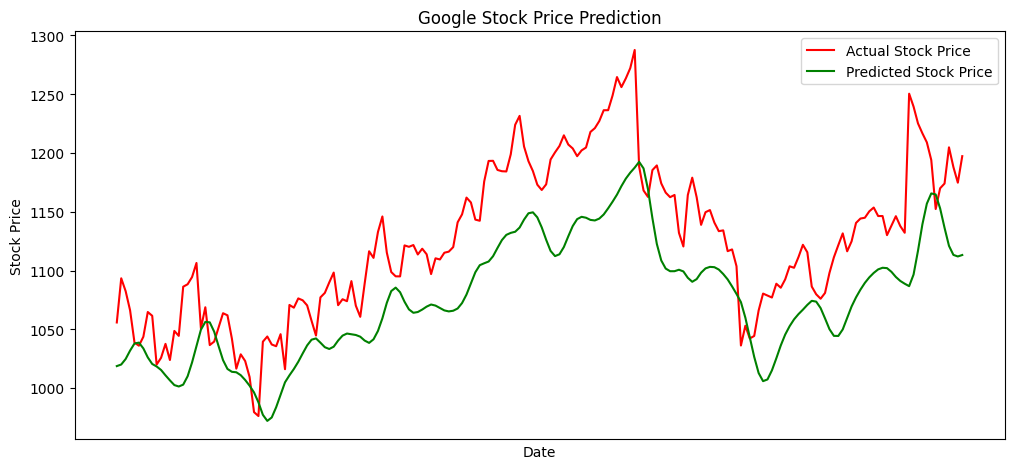

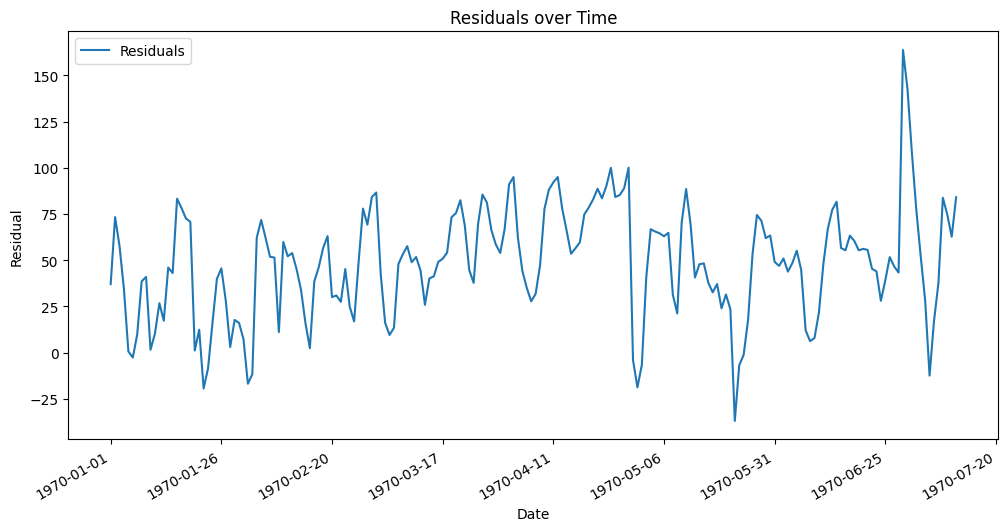

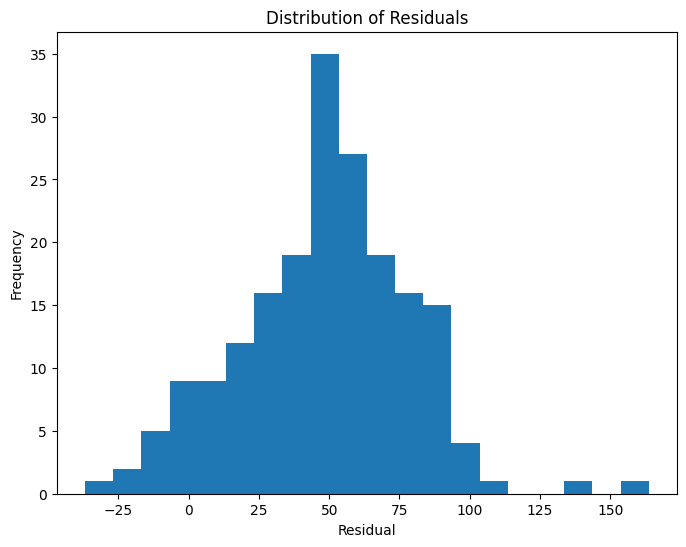

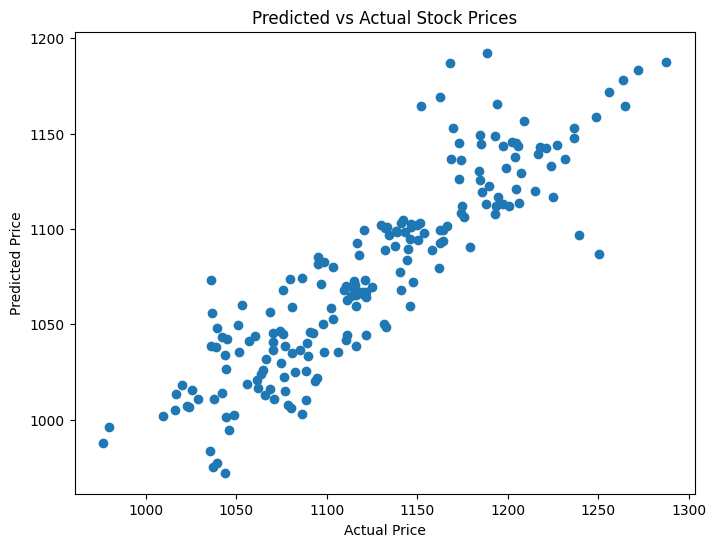

In [19]:
import matplotlib.dates as mdates

# Convert y_test and predicted_price to pandas Series with datetime index
dates = pd.to_datetime(testData.index[60:])
y_test_series = pd.Series(y_test.flatten(), index=dates)
predicted_price_series = pd.Series(predicted_price.flatten(), index=dates)

# Plot actual vs predicted prices with date on x-axis
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_series, color='red', label='Actual Stock Price')
ax.plot(predicted_price_series, color='green', label='Predicted Stock Price')
ax.set_title('Google Stock Price Prediction')
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.legend()
# Format x-axis to show dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()
plt.show()

# Plot residuals with date on x-axis
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(residuals, label='Residuals')
ax.set_title('Residuals over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Residual')
ax.legend()
# Format x-axis to show dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()
plt.show()

# Distribution of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20)
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of predicted vs actual prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicted_price)
plt.title('Predicted vs Actual Stock Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()


In [20]:
import plotly.graph_objects as go
# Plot actual vs predicted prices with date on x-axis using Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=dates, y=y_test_series, mode='lines', name='Actual Stock Price', line=dict(color='red')))
fig.add_trace(go.Scatter(x=dates, y=predicted_price_series, mode='lines', name='Predicted Stock Price', line=dict(color='green')))
fig.update_layout(title='Google Stock Price Prediction', xaxis_title='Date', yaxis_title='Stock Price')
fig.show()

# Plot residuals with date on x-axis using Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=dates, y=residuals.flatten(), mode='lines', name='Residuals', line=dict(color='blue')))
fig.update_layout(title='Residuals over Time', xaxis_title='Date', yaxis_title='Residual')
fig.show()

# Distribution of residuals using Plotly
fig = go.Figure(data=[go.Histogram(x=residuals.flatten())])
fig.update_layout(title='Distribution of Residuals', xaxis_title='Residual', yaxis_title='Frequency')
fig.show()

# Scatter plot of predicted vs actual prices using Plotly
fig = go.Figure(data=[go.Scatter(x=y_test.flatten(), y=predicted_price.flatten(), mode='markers')])
fig.update_layout(title='Predicted vs Actual Stock Prices', xaxis_title='Actual Price', yaxis_title='Predicted Price')
fig.show()


R-squared: 0.22104212273709622
Shapiro-Wilk Test for Normality:
Statistic: 0.9841568470001221
p-value: 0.029144177213311195
Residuals do not appear to be normally distributed (reject H0)


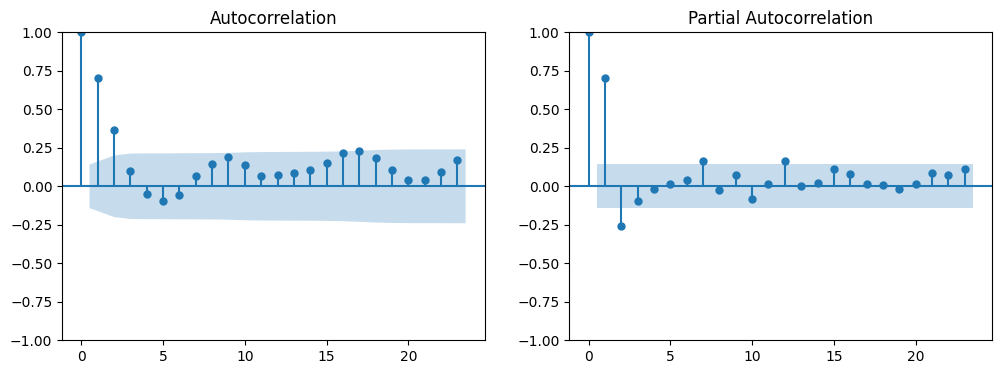


Further Conclusions:
- The R-squared value indicates how well the model fits the data. A higher R-squared value (closer to 1) suggests a better fit.
- The Shapiro-Wilk test helps assess whether the residuals are normally distributed, which is an assumption of many statistical models. If the residuals are not normally distributed, it might suggest that the model is not capturing all the information in the data.
- The autocorrelation and partial autocorrelation plots of the residuals can help identify any remaining patterns or dependencies in the errors, which could be used to improve the model.
- Consider exploring additional features or data transformations that might improve the model's predictive power.
- It's important to remember that stock price prediction is a complex task with inherent uncertainty. No model can perfectly predict future prices.


In [21]:
# Calculate and print R-squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predicted_price)
print('R-squared:', r2)

# Check for normality of residuals
from scipy.stats import shapiro
stat, p = shapiro(residuals)
print('Shapiro-Wilk Test for Normality:')
print('Statistic:', stat)
print('p-value:', p)
alpha = 0.05
if p > alpha:
    print('Residuals appear to be normally distributed (fail to reject H0)')
else:
    print('Residuals do not appear to be normally distributed (reject H0)')

# Plot autocorrelation and partial autocorrelation of residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(residuals, ax=axes[0])
plot_pacf(residuals, ax=axes[1])
plt.show()

print("\nFurther Conclusions:")
print("- The R-squared value indicates how well the model fits the data. A higher R-squared value (closer to 1) suggests a better fit.")
print("- The Shapiro-Wilk test helps assess whether the residuals are normally distributed, which is an assumption of many statistical models. If the residuals are not normally distributed, it might suggest that the model is not capturing all the information in the data.")
print("- The autocorrelation and partial autocorrelation plots of the residuals can help identify any remaining patterns or dependencies in the errors, which could be used to improve the model.")
print("- Consider exploring additional features or data transformations that might improve the model's predictive power.")
print("- It's important to remember that stock price prediction is a complex task with inherent uncertainty. No model can perfectly predict future prices.")
